# Cufflinks Transcript Abundance Estimation

Trapnell, Cole, et al. "Transcript assembly and quantification by RNA-Seq reveals unannotated transcripts and isoform switching during cell differentiation." Nature biotechnology 28.5 (2010): 511-515.

In [2]:
%matplotlib inline
import functools

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

import ipywidgets
from ipywidgets import interact, interactive
from IPython.display import display

## Fragment Length Distribution

In the paper of Cornell et al. they model the fragment length distribution with a normal distribution.

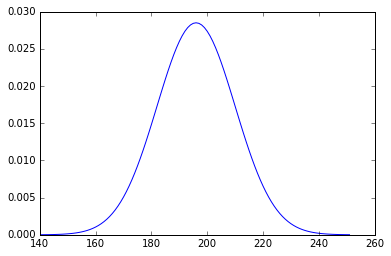

functools.partial(<bound method rv_continuous.pdf of <scipy.stats._continuous_distns.norm_gen object at 0x7f18bc6d54e0>>, scale=14, loc=196)

In [3]:
def build_fragment_length_dist(mu, sigma):
    x = np.arange(mu - 4*sigma, mu + 4*sigma)
    plt.plot(x, norm.pdf(x, loc=mu, scale=sigma))
    plt.show()
    
    return functools.partial(norm.pdf, loc=mu, scale=sigma)

fragment_dist = interactive(build_fragment_length_dist, mu=(100, 500), sigma=(1, 100))
display(fragment_dist)

## Transcript effective length

In [20]:
transcript_length = ipywidgets.IntSlider(value=1000, min=100, max=5000)
effective_length_widget = ipywidgets.Text()

def effective_length(lengths, fragment_dist):
    if not isinstance(lengths, np.ndarray):
        lengths = np.array([lengths])
        
    results = []
    for length in lengths:
        length_prob = fragment_dist(np.arange(1, length+1))
        multiplier = length - np.arange(length)
        
        results.append(np.sum(length_prob * multiplier))
    
    return np.array(results)

def update_effective_length(change):
    effective_length_widget.value = str(effective_length(change['new'], fragment_dist.result)[0])
    
transcript_length.observe(update_effective_length, "value")
display(transcript_length)
display(effective_length_widget)

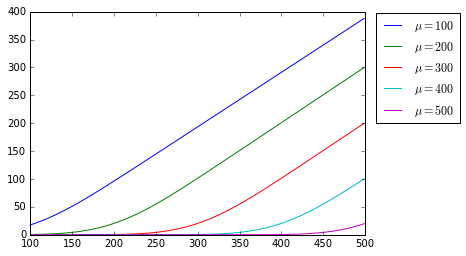

In [19]:
lengths = np.arange(100, 500)

dist_100 = functools.partial(norm.pdf, loc=100, scale=50)
dist_200 = functools.partial(norm.pdf, loc=200, scale=50)
dist_300 = functools.partial(norm.pdf, loc=300, scale=50)
dist_400 = functools.partial(norm.pdf, loc=400, scale=50)
dist_500 = functools.partial(norm.pdf, loc=500, scale=50)
plt.plot(
    lengths, effective_length(lengths, dist_100), 
    lengths, effective_length(lengths, dist_200), 
    lengths, effective_length(lengths, dist_300),
    lengths, effective_length(lengths, dist_400),
    lengths, effective_length(lengths, dist_500)
)
plt.legend(labels=[
    "$\mu = 100$",
    "$\mu = 200$",
    "$\mu = 300$",
    "$\mu = 400$",
    "$\mu = 500$"
], bbox_to_anchor=(1.3, 1.02))
plt.show()